In [1]:
###Import Modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv
import json
import requests

In [2]:
###URL for GET requests to retrieve vehicle data
url="https://data.cityofchicago.org/resource/gj7a-742p.json"

###Print the response object to the console
print(requests.get(url))

<Response [200]>


In [3]:
###Pretty print JSON for all launchpads
response = requests.get(url).json()

###Store response data in "online_data"
online_data = response

###Use json.dumps to print the json
print(json.dumps(online_data, indent=4, 
                 sort_keys=True))

[
    {
        "age": "20-29",
        "domestic_i": false,
        "gunshot_injury_i": "YES",
        "juvenile_i": false,
        "number_of_victims": "167",
        "primary_type": "BATTERY",
        "race": "BLK",
        "sex": "M",
        "time_period": "2022 Q2",
        "time_period_end": "2022-06-30T00:00:00.000",
        "time_period_start": "2022-03-01T00:00:00.000"
    },
    {
        "age": "20-29",
        "domestic_i": false,
        "gunshot_injury_i": "NO",
        "juvenile_i": false,
        "number_of_victims": "139",
        "primary_type": "ASSAULT",
        "race": "BLK",
        "sex": "F",
        "time_period": "2022 Q2",
        "time_period_end": "2022-06-30T00:00:00.000",
        "time_period_start": "2022-03-01T00:00:00.000"
    },
    {
        "age": "20-29",
        "domestic_i": true,
        "gunshot_injury_i": "NO",
        "juvenile_i": false,
        "number_of_victims": "136",
        "primary_type": "BATTERY",
        "race": "BLK",
        "s

In [4]:
###Print to see if you can access the dict.
print(online_data[0]['number_of_victims'])

167


In [5]:
###Read in the json data as a pandas data frame
chicago_crime_df = pd.read_json(url)
chicago_crime_df.rename(columns={'gunshot_injury_i':'gunshot_injury'},
                        inplace=True)
chicago_crime_df.head(50)

,time_period,time_period_start,time_period_end,primary_type,age,sex,race,juvenile_i,domestic_i,gunshot_injury,number_of_victims
0,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,BATTERY,20-29,M,BLK,0.0,False,YES,167
1,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,20-29,F,BLK,0.0,False,NO,139
2,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,BATTERY,20-29,F,BLK,0.0,True,NO,136
3,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ROBBERY,30-39,M,BLK,0.0,False,NO,131
4,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,20-29,F,BLK,0.0,True,NO,129
5,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ROBBERY,20-29,M,BLK,0.0,False,NO,127
6,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,30-39,M,BLK,0.0,False,NO,119
7,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,30-39,F,BLK,0.0,False,NO,116
8,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,20-29,M,BLK,0.0,False,NO,105
9,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,BATTERY,30-39,M,BLK,0.0,False,YES,97


In [6]:
###Quick Central Tendency Stats
chicago_crime_df.describe()

,juvenile_i,number_of_victims
count,915.000000,1000.000000
mean,0.119126,12.908000
std,0.324114,22.102218
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,4.000000
75%,0.000000,13.000000
max,1.000000,167.000000


In [7]:
###Replace "-" with "NaN"
chicago_crime_df = chicago_crime_df.replace('-', np.nan)
chicago_crime_df.head(50)

,time_period,time_period_start,time_period_end,primary_type,age,sex,race,juvenile_i,domestic_i,gunshot_injury,number_of_victims
0,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,BATTERY,20-29,M,BLK,0.0,False,YES,167
1,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,20-29,F,BLK,0.0,False,NO,139
2,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,BATTERY,20-29,F,BLK,0.0,True,NO,136
3,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ROBBERY,30-39,M,BLK,0.0,False,NO,131
4,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,20-29,F,BLK,0.0,True,NO,129
5,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ROBBERY,20-29,M,BLK,0.0,False,NO,127
6,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,30-39,M,BLK,0.0,False,NO,119
7,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,30-39,F,BLK,0.0,False,NO,116
8,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,20-29,M,BLK,0.0,False,NO,105
9,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,BATTERY,30-39,M,BLK,0.0,False,YES,97


In [8]:
###Create a new column that converts the "date_time_start and date_time_end" columns into datetime format
#ln=lambda x: str(x).split(',')
chicago_crime_df['date_time_start'] = pd.to_datetime(chicago_crime_df['time_period_start'])
chicago_crime_df['date_time_end'] = pd.to_datetime(chicago_crime_df['time_period_end'])

print(chicago_crime_df.info())
chicago_crime_df.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_period        1000 non-null   object        
 1   time_period_start  1000 non-null   object        
 2   time_period_end    1000 non-null   object        
 3   primary_type       1000 non-null   object        
 4   age                1000 non-null   object        
 5   sex                1000 non-null   object        
 6   race               1000 non-null   object        
 7   juvenile_i         915 non-null    float64       
 8   domestic_i         1000 non-null   bool          
 9   gunshot_injury     1000 non-null   object        
 10  number_of_victims  1000 non-null   int64         
 11  date_time_start    1000 non-null   datetime64[ns]
 12  date_time_end      1000 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(8)
m

,time_period,time_period_start,time_period_end,primary_type,age,sex,race,juvenile_i,domestic_i,gunshot_injury,number_of_victims,date_time_start,date_time_end
0,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,BATTERY,20-29,M,BLK,0.0,False,YES,167,2022-03-01,2022-06-30
1,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,20-29,F,BLK,0.0,False,NO,139,2022-03-01,2022-06-30
2,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,BATTERY,20-29,F,BLK,0.0,True,NO,136,2022-03-01,2022-06-30
3,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ROBBERY,30-39,M,BLK,0.0,False,NO,131,2022-03-01,2022-06-30
4,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,20-29,F,BLK,0.0,True,NO,129,2022-03-01,2022-06-30
5,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ROBBERY,20-29,M,BLK,0.0,False,NO,127,2022-03-01,2022-06-30
6,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,30-39,M,BLK,0.0,False,NO,119,2022-03-01,2022-06-30
7,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,30-39,F,BLK,0.0,False,NO,116,2022-03-01,2022-06-30
8,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,20-29,M,BLK,0.0,False,NO,105,2022-03-01,2022-06-30
9,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,BATTERY,30-39,M,BLK,0.0,False,YES,97,2022-03-01,2022-06-30


In [9]:
###Filter data to include only male victims in the year 2022
male_victims = chicago_crime_df[(chicago_crime_df['sex'] == 'M') &
                       (chicago_crime_df['date_time_start'] >= '01/01/2022') &
                       (chicago_crime_df['date_time_start'] < '12/31/2022')]
male_victims

,time_period,time_period_start,time_period_end,primary_type,age,sex,race,juvenile_i,domestic_i,gunshot_injury,number_of_victims,date_time_start,date_time_end
0,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,BATTERY,20-29,M,BLK,0.0,False,YES,167,2022-03-01,2022-06-30
3,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ROBBERY,30-39,M,BLK,0.0,False,NO,131,2022-03-01,2022-06-30
5,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ROBBERY,20-29,M,BLK,0.0,False,NO,127,2022-03-01,2022-06-30
6,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,30-39,M,BLK,0.0,False,NO,119,2022-03-01,2022-06-30
8,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,20-29,M,BLK,0.0,False,NO,105,2022-03-01,2022-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,2022 Q1,2022-01-01T00:00:00.000,2022-03-31T00:00:00.000,HOMICIDE,60-69,M,BLK,0.0,False,YES,2,2022-01-01,2022-03-31
990,2022 Q1,2022-01-01T00:00:00.000,2022-03-31T00:00:00.000,ASSAULT,30-39,M,I,0.0,False,NO,2,2022-01-01,2022-03-31
992,2022 Q1,2022-01-01T00:00:00.000,2022-03-31T00:00:00.000,BATTERY,UNKNOWN,M,WWH,NaN,False,NO,2,2022-01-01,2022-03-31
996,2022 Q1,2022-01-01T00:00:00.000,2022-03-31T00:00:00.000,BATTERY,30-39,M,API,0.0,False,NO,2,2022-01-01,2022-03-31


In [10]:
###Filter data to include only female victims in the year 2022
female_victims = chicago_crime_df[(chicago_crime_df['sex'] == 'F') &
                       (chicago_crime_df['date_time_start'] >= '01/01/2022') &
                       (chicago_crime_df['date_time_start'] < '12/31/2022')]
female_victims

,time_period,time_period_start,time_period_end,primary_type,age,sex,race,juvenile_i,domestic_i,gunshot_injury,number_of_victims,date_time_start,date_time_end
1,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,20-29,F,BLK,0.0,False,NO,139,2022-03-01,2022-06-30
2,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,BATTERY,20-29,F,BLK,0.0,True,NO,136,2022-03-01,2022-06-30
4,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,20-29,F,BLK,0.0,True,NO,129,2022-03-01,2022-06-30
7,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,30-39,F,BLK,0.0,False,NO,116,2022-03-01,2022-06-30
12,2022 Q2,2022-03-01T00:00:00.000,2022-06-30T00:00:00.000,ASSAULT,30-39,F,BLK,0.0,True,NO,94,2022-03-01,2022-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2022 Q1,2022-01-01T00:00:00.000,2022-03-31T00:00:00.000,BATTERY,50-59,F,WHI,0.0,False,NO,2,2022-01-01,2022-03-31
994,2022 Q1,2022-01-01T00:00:00.000,2022-03-31T00:00:00.000,ROBBERY,80+,F,BLK,0.0,False,NO,2,2022-01-01,2022-03-31
995,2022 Q1,2022-01-01T00:00:00.000,2022-03-31T00:00:00.000,CRIMINAL SEXUAL ASSAULT,50-59,F,WWH,0.0,True,NO,2,2022-01-01,2022-03-31
997,2022 Q1,2022-01-01T00:00:00.000,2022-03-31T00:00:00.000,ROBBERY,40-49,F,I,0.0,False,NO,2,2022-01-01,2022-03-31


In [11]:
###Total number of female victims in year 2022
female_victims['number_of_victims'].agg('sum')

5313

In [12]:
###Total number of male victims in year 2022
male_victims['number_of_victims'].agg('sum')

7219

In [13]:
###Grouping chicago_crime_df by gender
gender_groups = chicago_crime_df.groupby(['sex'])

In [14]:
###View gender_groups object as a dictionary
gender_groups.groups

{'F': [1, 2, 4, 7, 12, 14, 19, 21, 23, 30, 32, 34, 36, 38, 40, 42, 46, 48, 49, 51, 53, 54, 56, 58, 63, 67, 71, 73, 79, 81, 91, 92, 93, 94, 97, 98, 101, 104, 105, 108, 111, 112, 113, 114, 115, 116, 118, 120, 122, 124, 125, 126, 127, 128, 129, 131, 132, 134, 135, 136, 145, 147, 148, 152, 153, 155, 157, 158, 159, 162, 163, 165, 168, 170, 171, 173, 175, 180, 185, 186, 188, 189, 190, 191, 192, 196, 198, 200, 204, 205, 207, 209, 210, 211, 214, 216, 220, 221, 222, 227, ...], 'M': [0, 3, 5, 6, 8, 9, 10, 11, 15, 16, 17, 18, 20, 22, 24, 25, 26, 27, 28, 29, 31, 33, 35, 37, 39, 43, 44, 45, 47, 50, 52, 55, 57, 59, 60, 62, 64, 65, 66, 68, 69, 70, 72, 74, 75, 76, 77, 78, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 96, 99, 100, 102, 103, 106, 107, 109, 110, 117, 119, 121, 123, 130, 133, 137, 138, 139, 140, 141, 142, 143, 144, 146, 149, 150, 151, 154, 156, 160, 161, 166, 167, 169, 172, 174, 176, 177, 178, 179, 181, 182, ...], 'UNKNOWN': [13, 41, 61, 95, 164, 223, 408, 413, 424, 446, 455, 464, 468, 492, 518

In [15]:
###Aggregate or 'add up' the number of victims for each gender category
gender_groups['number_of_victims'].agg('sum')

sex
F          5313
M          7219
UNKNOWN     376
Name: number_of_victims, dtype: int64

In [16]:
###Place the aggregated race groups object into a pandas dataframe
gender_totals = pd.DataFrame(gender_groups['number_of_victims'].agg('sum'))
gender_totals.sort_values(ascending=False,by='number_of_victims',inplace=True)
gender_totals

,number_of_victims
sex,
M,7219
F,5313
UNKNOWN,376


<AxesSubplot:xlabel='sex'>

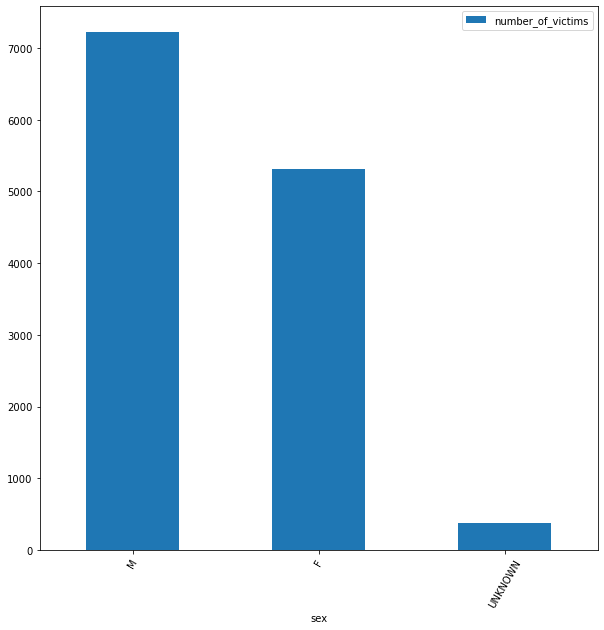

In [17]:
###Plot the gender_totals as a bar graph
gender_totals.plot(kind='bar', y ='number_of_victims', rot=60, figsize=(10,10))

In [26]:
###Grouping chicago_crime_df by race
race_groups = chicago_crime_df.groupby(['race'])
race_groups

In [18]:
###View race_groups object as a dictionary
race_groups.groups

{'API': [59, 60, 146, 147, 167, 201, 202, 206, 224, 237, 255, 265, 280, 302, 312, 373, 374, 381, 404, 405, 433, 440, 444, 453, 463, 471, 475, 478, 511, 524, 539, 553, 566, 567, 572, 578, 581, 583, 592, 594, 598, 609, 610, 612, 613, 621, 623, 624, 681, 711, 721, 737, 742, 746, 783, 791, 816, 819, 832, 860, 878, 891, 938, 944, 967, 968, 971, 979, 991, 996, 998], 'BLK': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 14, 15, 16, 17, 19, 21, 22, 23, 26, 28, 29, 31, 32, 33, 34, 37, 39, 40, 42, 44, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 65, 66, 67, 68, 69, 71, 74, 75, 77, 78, 79, 84, 92, 94, 96, 97, 102, 103, 105, 106, 108, 110, 114, 115, 117, 120, 121, 124, 126, 127, 129, 135, 137, 142, 143, 144, 149, 150, 153, 155, 157, 159, 162, 165, 168, 170, 171, 180, 181, 182, 183, 188, 190, 191, 195, 197, 198, ...], 'I': [231, 282, 306, 327, 339, 349, 420, 458, 506, 509, 512, 546, 580, 626, 627, 847, 861, 990, 997], 'UNKNOWN': [13, 41, 61, 95, 119, 133, 164, 174, 175, 194, 196, 209, 213, 218, 223, 243, 24

In [19]:
###Aggregate or 'add up' the number of victims for each race category
race_groups['number_of_victims'].agg('sum')

race
API         351
BLK        7482
I            40
UNKNOWN     678
WBH          97
WHI        1451
WWH        2809
Name: number_of_victims, dtype: int64

In [20]:
###Place the aggregated race groups object into a pandas dataframe
race_totals = pd.DataFrame(race_groups['number_of_victims'].agg('sum'))
race_totals.sort_values(ascending=False,by='number_of_victims',inplace=True)
race_totals

,number_of_victims
race,
BLK,7482
WWH,2809
WHI,1451
UNKNOWN,678
API,351
WBH,97
I,40


In [21]:
###Top 5 race group victims
race_totals.head(5)

,number_of_victims
race,
BLK,7482
WWH,2809
WHI,1451
UNKNOWN,678
API,351


In [22]:
###Bottom 5 race group victims
race_totals.tail(5)

,number_of_victims
race,
WHI,1451
UNKNOWN,678
API,351
WBH,97
I,40


<AxesSubplot:xlabel='race'>

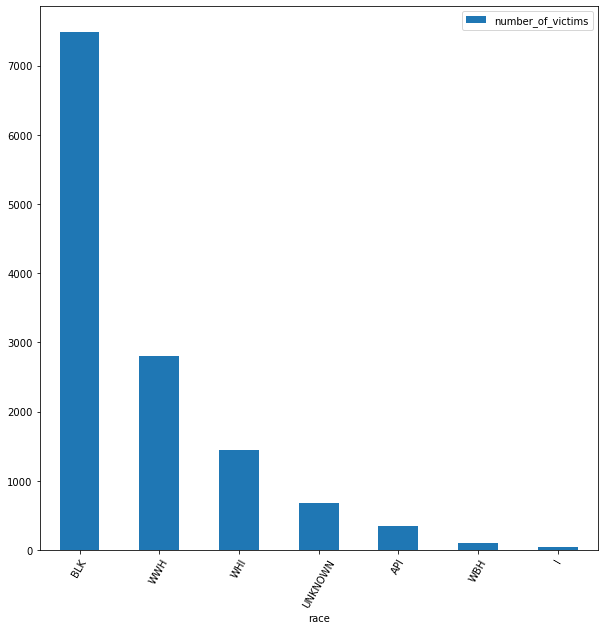

In [23]:
###Plot the race_totals as a bar graph
race_totals.plot(kind='bar', y ='number_of_victims', rot=60, figsize=(10,10))

In [24]:
###Grouping chicago_crime_df by 'primary_type' or 'assault_type'
assault_type_groups = chicago_crime_df.groupby(['primary_type'])
###View assault_type object as a dictionary
assault_type_groups.groups
###Place the aggregated race groups object into a pandas dataframe
assault_type_totals = pd.DataFrame(assault_type_groups['number_of_victims'].agg('sum'))
assault_type_totals.sort_values(ascending=False,by='number_of_victims',inplace=True)
assault_type_totals

,number_of_victims
primary_type,
ROBBERY,4223
ASSAULT,3968
BATTERY,3701
CRIMINAL SEXUAL ASSAULT,742
HOMICIDE,259
NON-FATAL,15


<AxesSubplot:xlabel='primary_type'>

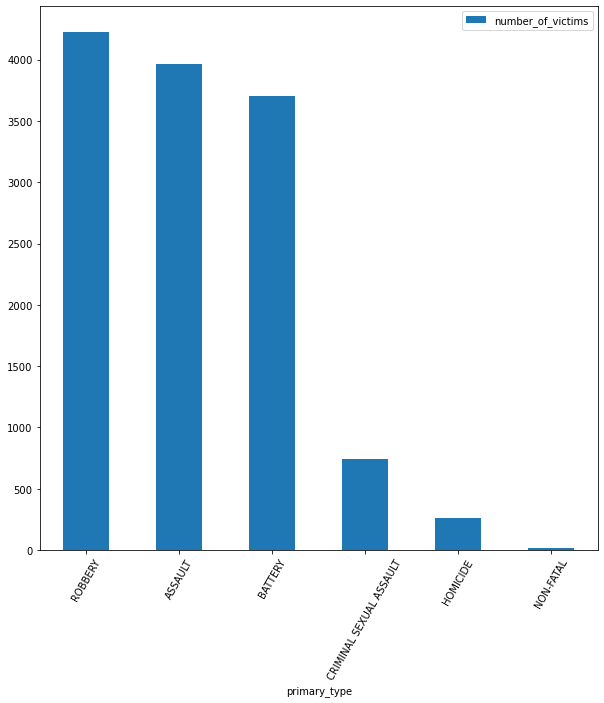

In [25]:
###Plot the race_totals as a bar graph
assault_type_totals.plot(kind='bar', y ='number_of_victims', rot=60, figsize=(10,10))